In [29]:
!pip install wordcloud

In [ ]:
import pandas as pd          
import seaborn as sns        
import matplotlib.pyplot as plt   

Load the Dataset

In [16]:
df = pd.read_csv(r"C:\Users\HP\Downloads\twitter_training.csv\twitter_training.csv")
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [17]:
df.columns = ['tweet_id', 'entity', 'sentiment', 'text']
df.head()

,tweet_id,entity,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   74681 non-null  int64 
 1   entity     74681 non-null  object
 2   sentiment  74681 non-null  object
 3   text       73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


Clean the Text

In [22]:
import re

In [23]:
def clean_text(text):
    text = str(text) 
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text.lower()

In [24]:
# Optional: remove missing values from 'text' column
df = df.dropna(subset=['text'])

In [25]:
# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)

Show Sentiment Counts

C:\Users\HP\AppData\Local\Temp\ipykernel_15480\1058100044.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2')


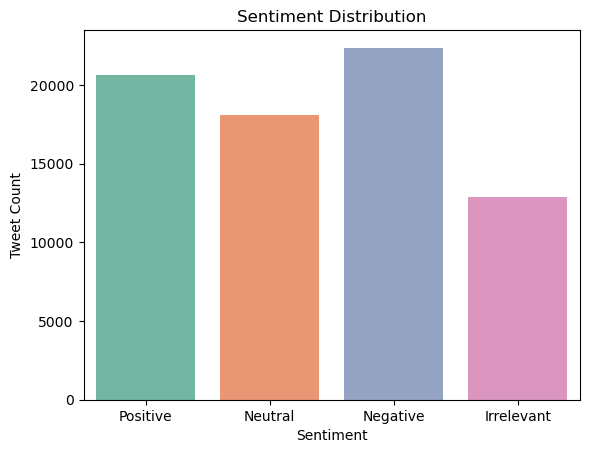

In [26]:
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

Create Word Cloud for Each Sentiment

In [30]:
from wordcloud import WordCloud 

In [ ]:
def show_wordcloud(sentiment_type):
    text = " ".join(df[df['sentiment'] == sentiment_type]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment_type} Sentiment")
    plt.show()

show_wordcloud('Positive')   
show_wordcloud('Negative')   
show_wordcloud('Neutral') 

Sentiment per Entity (like brand/topic)

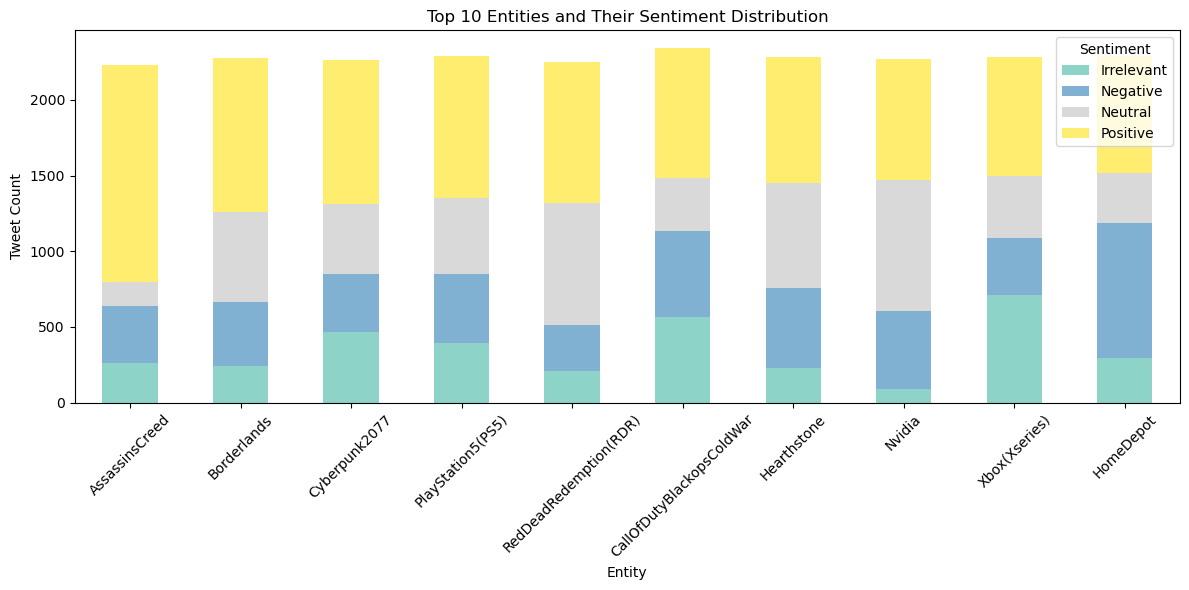

In [33]:
top_entities.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title("Top 10 Entities and Their Sentiment Distribution")
plt.xlabel("Entity")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()